# Carte de l'ensoleillement annuel moyen en France par départements 

L'objectif de ce document est de présenter le contexte climatique de la France, en visualisant des données classiques en météorologie sur des cartes.

## Importations des données

On commence par importer les paquets et les variables du projet, stockées dans les fichiers "requirements.txt" et "declarations.py".

In [ ]:
!pip install -r requirements.txt

In [10]:
import declarations_AV as dec
import matplotlib.pyplot as plt
import pandas as pd

Maintenant que les imports sont faits, on cherche à afficher le tableau des données d'ensoleillement par département en France, au cours de l'année 2022

In [3]:
#On importe la table à partir d'un fichier csv
ensoleillement=pd.read_csv(dec.url_soleil)
#On renomme la dernière colonne, mal nommée dans le document original
ensoleillement=ensoleillement.rename(columns={'Départements' : 'Départements',"Temps d'enseillement (jours/an)": "Temps d'ensoleillement (jours/an)"})
#On affiche la table
ensoleillement.head(3)

,Départements,Temps d'ensoleillement (jours/an)
0,Ain,182
1,Aisne,142
2,Allier,161


On aimerait désormais, pour rendre la visualisation plus agréable, représenter ce tableau sur une carte. Cependant pour ceci, il faut que nous ajoutions des données géographiques pour chaque département. Nous nous proposons d'utiliser le module cartiflette, codé par des administrateurs de l'INSEE.

On commence par importer le tableau des données géographiques par département.

In [6]:
departements=dec.dep
departements["area"] = departements.to_crs(2154).area

On en affiche quelques bouts pour voir à quoi il resssemble.

In [7]:
departements.head(3)

,id,ID,NOM_M,NOM,INSEE_DEP,INSEE_REG,source,territoire,geometry,area
0,DEPARTEM_FXX_00000000001,None,AIN,Ain,01,84,IGN:EXPRESS-COG-CARTO-TERRITOIRE,metropole,"POLYGON ((5.00939 46.50701, 5.00924 46.50701, ...",5.774291e+09
1,DEPARTEM_FXX_00000000002,None,AISNE,Aisne,02,32,IGN:EXPRESS-COG-CARTO-TERRITOIRE,metropole,"POLYGON ((3.07070 49.76692, 3.07055 49.76692, ...",7.418552e+09
2,DEPARTEM_FXX_00000000003,None,CORSE-DU-SUD,Corse-du-Sud,2A,94,IGN:EXPRESS-COG-CARTO-TERRITOIRE,metropole,"MULTIPOLYGON (((8.59803 41.88006, 8.59803 41.8...",4.033539e+09


Maintenant, nous introduisons un nouveau tableau, rassemblant les deux précédents, afin de mettre côte à côte les données géographiques et les données d'ensoleillement. On commence simplement par corriger quelques fautes d'orthographes ou de typographie dans les noms des deux tables, pour assurer la bonne fusion des données.

In [8]:
ensoleillement.at[25,'Départements']="Eure-et-Loir"
ensoleillement.at[3,'Départements']="Alpes-de-Haute-Provence"
ensoleillement.at[19,'Départements']="Côte-d'Or"
ensoleillement.at[87,'Départements']="Territoire de Belfort"
departements.at[37,'NOM']='Indre-et-Loire'

Maintenant, nous pouvons fusionner les deux tables.

In [9]:
soleil=departements.merge(ensoleillement, left_on='NOM', right_on='Départements')[['NOM','geometry', 'area', "Temps d'ensoleillement (jours/an)"]]
soleil.head(3)

,NOM,geometry,area,Temps d'ensoleillement (jours/an)
0,Ain,"POLYGON ((5.00939 46.50701, 5.00924 46.50701, ...",5.774291e+09,182
1,Aisne,"POLYGON ((3.07070 49.76692, 3.07055 49.76692, ...",7.418552e+09,142
2,Allier,"POLYGON ((2.56379 46.53199, 2.56379 46.53189, ...",7.365673e+09,161


On réalise à présent une carte de France de l'ensoleillement à partir des données récupérées : 

C:\Users\auran\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\geopandas\plotting.py:730: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(values.dtype):


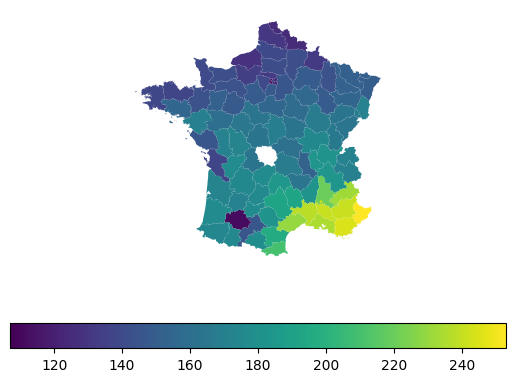

In [11]:
axis = soleil.plot(column = "Temps d'ensoleillement (jours/an)",legend='True', 
                   legend_kwds={"orientation":"horizontal"})
axis.set_axis_off()
plt.show()

Voilà la carte ! On remarque bien qu'il n'y a pas de données d'ensoleillement pour la Creuse ! De plus on n'a pas vraiment de source sur ces données, c'est-à-dire qu'on ne sait pas s'il s'agit d'une moyenne effectuée sur plusieurs années, ou seulement sur la dernière année. De plus, le résultat sur le Gers est particulièrement étonnant. A l'avenir, il ne faudra sans doute pas considérer ce département lorsque l'on utilisera les données d'ensoleillement.